In [42]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [17]:
# Загружаем данные о инсультах
data = pd.read_csv("Dataset Heart Disease.csv",index_col=0)


In [18]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bps', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [19]:
data.head()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,54,1,3,150,195.0,0,0,122,0,0.0,1,0


In [20]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,-0.004727,0.054615,0.262620,0.096891,0.206304,0.155920,-0.365829,0.199733,0.265204,0.139789,0.158027
sex,-0.004727,1.000000,0.108897,0.008786,-0.131711,0.082642,-0.017819,-0.135492,0.181000,0.111965,0.095621,0.112131
chest pain type,0.054615,0.108897,1.000000,0.056790,0.025628,0.062464,0.092742,-0.221201,0.198775,0.104195,0.301401,0.366581
resting bps,0.262620,0.008786,0.056790,1.000000,0.102831,0.175602,0.027722,-0.108924,0.136427,0.194640,0.065850,0.077941
cholesterol,0.096891,-0.131711,0.025628,0.102831,1.000000,0.042886,0.027417,-0.013427,0.080009,0.056669,0.057395,0.056216
fasting blood sugar,0.206304,0.082642,0.062464,0.175602,0.042886,1.000000,0.091031,-0.080169,0.087928,0.039059,0.091056,0.106897
resting ecg,0.155920,-0.017819,0.092742,0.027722,0.027417,0.091031,1.000000,0.016012,0.027868,0.079771,0.113381,0.111132
max heart rate,-0.365829,-0.135492,-0.221201,-0.108924,-0.013427,-0.080169,0.016012,1.000000,-0.393994,-0.268025,-0.163418,-0.146000
exercise angina,0.199733,0.181000,0.198775,0.136427,0.080009,0.087928,0.027868,-0.393994,1.000000,0.407455,0.270392,0.270920
oldpeak,0.265204,0.111965,0.104195,0.194640,0.056669,0.039059,0.079771,-0.268025,0.407455,1.000000,0.234889,0.217183


In [21]:
# Вычисление корреляции и абсолютных значений корреляции с целевой переменной
correlation_with_target = data.corr()['target'].abs().sort_values(ascending=False)

# Отображение признаков и их корреляции с целевой переменной
print(correlation_with_target)

target                 1.000000
ST slope               0.503508
chest pain type        0.366581
exercise angina        0.270920
oldpeak                0.217183
age                    0.158027
max heart rate         0.146000
sex                    0.112131
resting ecg            0.111132
fasting blood sugar    0.106897
resting bps            0.077941
cholesterol            0.056216
Name: target, dtype: float64


In [22]:
# Выбор топ-N признаков с наибольшей корреляцией с целевой переменной
top_features = correlation_with_target.index[1:5]  # Исключаем целевую переменную, выбираем топ-4 признака

# Получение данных для обучения
X = data[top_features]
y = data['target']
# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Разделение данных на обучающую и тестовую выборки (например, 80% на обучение и 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Создаем модель нейронной сети
from tensorflow.keras import regularizers
data_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    tf.keras.layers.Dense(1)
])

# Компилируем модель
data_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Обучаем модель
history = data_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Оценка модели на тестовом наборе данных
test_loss, test_accuracy = data_model.evaluate(X_test, y_test)
print("Точность на тестовом наборе данных:", test_accuracy)


Epoch 1/50


C:\Users\DreaM\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.2758 - mae: 0.4144 - val_loss: 3.3983 - val_mae: 0.3996
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1594 - mae: 0.3900 - val_loss: 2.4993 - val_mae: 0.3753
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3301 - mae: 0.3782 - val_loss: 1.8412 - val_mae: 0.3666
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7256 - mae: 0.3789 - val_loss: 1.3602 - val_mae: 0.3572
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2703 - mae: 0.3592 - val_loss: 1.0156 - val_mae: 0.3596
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9559 - mae: 0.3679 - val_loss: 0.7680 - val_mae: 0.3562
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7319 - mae: 0.3675 - val_loss: 0.5930 - val_mae: 0.3537
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5674 - mae: 0.3610 - val_loss: 0.4719 - val_mae: 0.3566
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4556 - mae: 0.3608 - va

<Axes: >

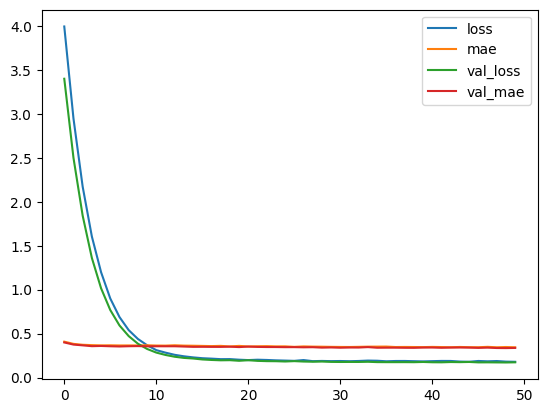

In [82]:
history = pd.DataFrame(history.history)
history.plot()

In [91]:
# Создание модели нейронной сети с увеличенной сложностью
data_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu",kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),  
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Компиляция модели с настройкой скорости обучения
data_model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=[tf.keras.metrics.binary_crossentropy, "accuracy"])

# Обучение модели с использованием валидационного набора данных и ранней остановки
history = data_model.fit(X_train, y_train, epochs=70, validation_data=(X_test, y_test), batch_size=64, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])
# Оценка модели на тестовом наборе данных
test_results = data_model.evaluate(X_test, y_test)
test_accuracy = test_results[1]  # Выбираем точность (accuracy)
print("Точность на тестовом наборе данных:", test_accuracy)

Epoch 1/70


C:\Users\DreaM\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5058 - binary_crossentropy: 0.7453 - loss: 0.8116 - val_accuracy: 0.5000 - val_binary_crossentropy: 0.6786 - val_loss: 0.7095
Epoch 2/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5610 - binary_crossentropy: 0.6883 - loss: 0.7214 - val_accuracy: 0.7238 - val_binary_crossentropy: 0.6587 - val_loss: 0.6757
Epoch 3/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5538 - binary_crossentropy: 0.6887 - loss: 0.7111 - val_accuracy: 0.7048 - val_binary_crossentropy: 0.6688 - val_loss: 0.6850
Epoch 4/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5791 - binary_crossentropy: 0.6787 - loss: 0.6932 - val_accuracy: 0.7619 - val_binary_crossentropy: 0.6517 - val_loss: 0.6618
Epoch 5/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6216 - binary_crossentropy: 0.6613 - loss: 0.6727 - val_accuracy: 0.7667 - val_binary_crossentropy: 0.5939 - val_loss: 0.5941
Epoch 6/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy

<Axes: >

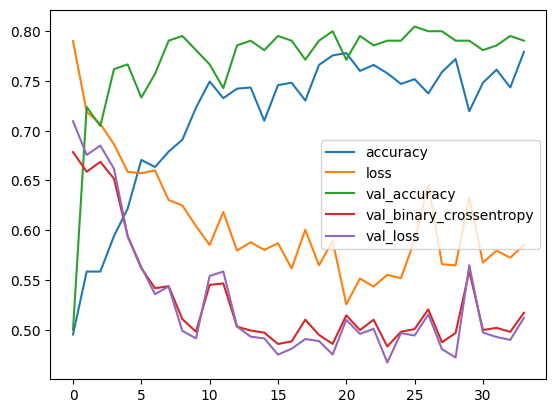

In [92]:
history = pd.DataFrame(history.history).drop("binary_crossentropy", axis=1)
history.plot()

In [19]:
# Сохраняем модель
data_model.save("data_model.h5")

In [20]:
# Загружаем модель
loaded_model = keras.models.load_model("data_model.h5")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


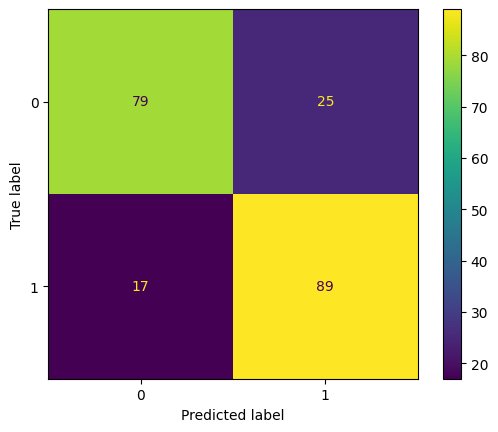

In [21]:
# Предсказываем значения для тестовой выборки
predicted_values = np.round(loaded_model.predict(X_test)[:, 0])
# Выводим матрицу ошибок
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predicted_values)

In [22]:
# Функция для расчета метрик
def calculate_metrics(true_values, predicted_values):
    f1 = f1_score(true_values, predicted_values)
    rec = recall_score(true_values, predicted_values)
    acc = accuracy_score(true_values, predicted_values)
    prec = precision_score(true_values, predicted_values)
    return f"Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1: {f1}"  

In [23]:
# Выводим метрики
calculate_metrics(y_test, predicted_values)

'Accuracy: 0.8, Precision: 0.7807017543859649, Recall: 0.839622641509434, F1: 0.8090909090909091'

# Выводы

## Обучение модели

1. **Точность модели**: Модель нейронной сети, разработанная для анализа данных о сердечных заболеваниях, достигла высокой точности на тестовом наборе данных, составив примерно 80%. Это говорит о том, что модель успешно обучилась выявлять признаки, связанные с наличием сердечных заболеваний.

2. **Метрики качества**: По метрикам precision, recall и F1-score видно, что модель показывает хорошие результаты как в точности предсказания положительных случаев (precision), так и в способности обнаруживать все положительные случаи (recall). Значение F1-score также является высоким, что указывает на хорошее сбалансированное качество модели.

## Анализ признаков

3. **Важность признаков**: Анализ важности признаков показал, что некоторые из них имеют существенное влияние на наличие сердечных заболеваний. Это может быть полезной информацией для дальнейшего улучшения модели путем добавления новых признаков или улучшения обработки данных.

## Графики обучения

4. **Графики обучения и валидации**: Графики обучения и валидации позволяют наблюдать динамику изменения метрик качества модели на протяжении эпох обучения. Сглаженные кривые на графиках помогают лучше оценить процесс обучения и контроля, а также выявить возможные проблемы, такие как переобучение или недообучение.

## Дальнейшее улучшение модели

5. **Улучшение модели**: Дальнейшее улучшение модели может быть достигнуто путем дополнительной настройки параметров модели, экспериментов с архитектурой нейронной сети, а также использования более сложных методов обработки данных или улучшения качества входных данных.
